<a href="https://colab.research.google.com/github/connorfarrell7/Predicting_Placements_for_Engineering_Students/blob/mmetwalli96/Student_Placement_Records_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing dependencies
import psycopg2
import getpass
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# Connect to the database
server_pass = getpass.getpass('Enter database password: ')
engine = psycopg2.connect(
    database="postgres",
    user="group_4",
    password=server_pass,
    host="capstone-project.c9uk6piofxnr.us-east-2.rds.amazonaws.com",
    port='5432'
)

Enter database password: ··········


In [3]:
# Importing the data from the databse 
sql = "select * from student_data;"
student_records_df = pd.read_sql_query(sql, engine)
student_records_df.head()

,age,gender,stream,internships,cgpa,hostel,history_of_backlogs,placed_or_not,id
0,22,Male,Electronics And Communication,1,8,1,1,1,1
1,21,Female,Computer Science,0,7,1,1,1,2
2,22,Female,Information Technology,1,6,0,0,1,3
3,21,Male,Information Technology,0,8,0,1,1,4
4,22,Male,Mechanical,0,8,1,0,1,5


In [4]:
# Checking the number of null and na values in the data

# Checking the number of null values
null = student_records_df.isnull().sum()

# Checking the number of na values
na = student_records_df.isna().sum()

# Combining the two results
null_na = pd.concat([null, na], axis=1)
null_na = null_na.rename(columns = {0: 'Null Count', 1: 'Na Count'})
null_na.index.name = 'Column Name'
null_na

,Null Count,Na Count
Column Name,,
age,0,0
gender,0,0
stream,0,0
internships,0,0
cgpa,0,0
hostel,0,0
history_of_backlogs,0,0
placed_or_not,0,0
id,0,0


In [5]:
# Creating a pandas series to know the age groups and the number of students in each one and how many were placed or not

# Grouping based on age
age_groups = student_records_df['age'].value_counts()
age_groups = pd.DataFrame({'Total Count' : age_groups.values.tolist()}, index = age_groups.index.to_list())
age_groups.index.name='Age'

# Splitting the student records to placed and not placed
placed_students = student_records_df[student_records_df['placed_or_not'] == 1]
not_placed_students = student_records_df[student_records_df['placed_or_not'] == 0]

# Placed students grouped by age
age_groups_placed = placed_students['age'].value_counts()
age_groups_placed = pd.DataFrame({'Placed Students Count' : age_groups_placed.values.tolist()}, index = age_groups_placed.index.to_list())
age_groups_placed.index.name = 'Age'

# Not placed students grouped by age
age_groups_not_placed = not_placed_students['age'].value_counts()
age_groups_not_placed = pd.DataFrame({'Non-Placed Students Count' : age_groups_not_placed.values.tolist()}, index = age_groups_not_placed.index.to_list())
age_groups_not_placed.index.name = 'Age'

# Grouped student records by age and placement
age_groups_df = pd.concat([age_groups_placed, age_groups_not_placed, age_groups], axis=1)
age_groups_df = age_groups_df.fillna(0).astype({'Non-Placed Students Count': 'int64'})
age_groups_df

,Placed Students Count,Non-Placed Students Count,Total Count
Age,,,
19,92,64,156
20,199,176,375
21,617,467,1084
22,478,463,941
23,85,110,195
24,104,27,131
25,22,7,29
26,37,13,50
28,3,0,3


In [6]:
# Creating a pandas dataframe to get the average of age and CGPA by stream
avg_by_stream = student_records_df.groupby('stream').mean().drop(['internships', 'hostel', 'history_of_backlogs', 'placed_or_not', 'id'], 1)
avg_by_stream = avg_by_stream.rename(columns={"age": "Age", "cgpa": "CGPA"})
avg_by_stream 

,Age,CGPA
stream,,
Civil,21.441640,7.094637
Computer Science,21.559278,7.039948
Electrical,21.299401,7.080838
Electronics And Communication,21.410377,7.125000
Information Technology,21.539797,7.073806
Mechanical,21.518868,7.063679


In [7]:
# Group student placement by gender

# Total students
gender = student_records_df['gender'].value_counts()
gender = pd.DataFrame({'Total Count': gender.values.tolist()}, index= gender.index.to_list())
gender.index.name = 'Gender'

# Placed studnets
gender_placed  = placed_students['gender'].value_counts()
gender_placed = pd.DataFrame({'Placed Students Count': gender_placed.values.tolist()}, index= gender_placed.index.to_list())

# Non-Placed students
gender_not_placed = not_placed_students['gender'].value_counts()
gender_not_placed = pd.DataFrame({'Non-Placed Students Count': gender_not_placed.values.tolist()}, index= gender_not_placed.index.to_list())

# Average CGPA and age by gender
avg_by_gender = student_records_df.groupby('gender').mean().drop(['internships', 'hostel', 'history_of_backlogs', 'placed_or_not', 'id'], 1)
avg_by_gender = avg_by_gender.rename(columns={"age": "Age", "cgpa": "CGPA"})

# Grouped student records by gender and placement
gender_df = pd.concat([gender_placed, gender_not_placed, gender, avg_by_gender], axis=1)
gender_df

,Placed Students Count,Non-Placed Students Count,Total Count,Age,CGPA
Male,1364,1111,2475,21.473131,7.072323
Female,275,216,491,21.549898,7.081466


In [8]:
# Stistical Summary of the student records
student_summary = student_records_df[['age', 'internships', 'hostel', 'history_of_backlogs', 'placed_or_not']].describe()
student_summary

,age,internships,hostel,history_of_backlogs,placed_or_not
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,1.000000,1.000000,1.000000


In [9]:
avg_data = {'Average Placement Rate': student_summary.at['mean', 'placed_or_not'],
            'Average Age': student_summary.at['mean','age'],
            'Average Student Rate Living in Dorms': student_summary.at['mean', 'hostel']           
            }
avg_df = pd.DataFrame(data = avg_data, index=['Value'])
avg_df 

,Average Placement Rate,Average Age,Average Student Rate Living in Dorms
Value,0.552596,21.48584,0.269049


In [19]:
# Changing the value of placed_or_not columns from [0,1] to [placed, not placed]
placed_students.loc[:,'placed_or_not'] = 'Placed'
not_placed_students.loc[:,'placed_or_not'] = 'Not Placed'
student_df = pd.concat([placed_students, not_placed_students], axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


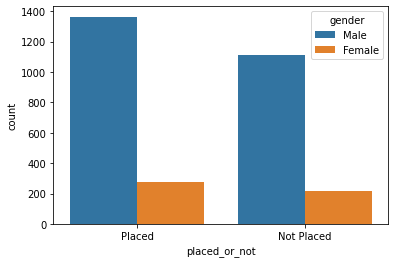

In [32]:
# Plotting the number of placed and non-placed students
sns.countplot(data= student_df, x = 'placed_or_not', orient= 'v', hue='gender')

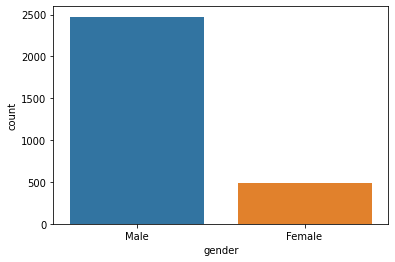

In [22]:
# Plotting the number of students based on gender 
sns.countplot(data= student_df, x = 'gender', orient='v')

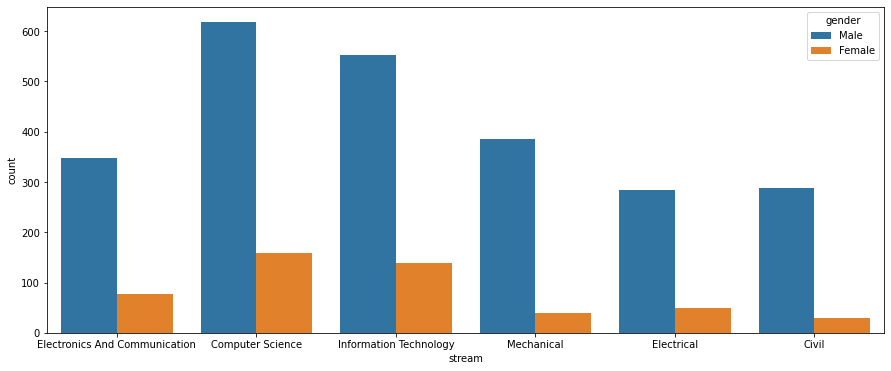

In [29]:
# Plotting the number of studenst based on stream and gender
sns.countplot(data= student_df, x = 'stream', orient='v', hue='gender')
plt.gcf().set_size_inches(15, 6)

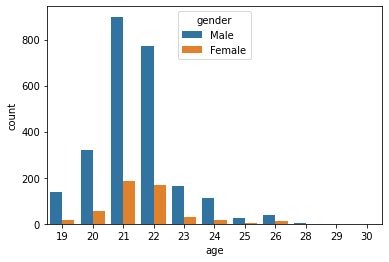

In [31]:
# Plotting the number of studenst based on age and gender
sns.countplot(data= student_df, x = 'age', orient= 'v', hue='gender')

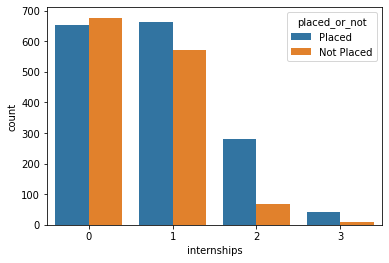

In [33]:
# Plotting the number of studenst based on the number of internships and placement status
sns.countplot(data= student_df, x = 'internships', orient= 'v', hue='placed_or_not')